# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Flight_Train.xlsx')
test = pd.read_excel('Flight_Test.xlsx')

In [3]:
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [5]:
train.shape, test.shape

((10683, 11), (2671, 10))

# Merging the train and test dataset for data cleaning

Since we have separate train and test datasets, we will approach it by first merging the two datasets into one for exploring and cleaning the data, after all that process we will separate the datasets back to train and test as they were provided.

In [33]:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, df.shape

((10683, 12), (2671, 11), (13354, 12))

We introduce another column in the two datasets namely 'source', so it will be easy for us to separate the two datasets after data cleaning.

In [34]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
dtype: object

In [35]:
df.apply(lambda x: len(x.unique()))

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               133
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           6
Additional_Info      10
Price              1871
source                2
dtype: int64

# Checking and treating missing values

In [36]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

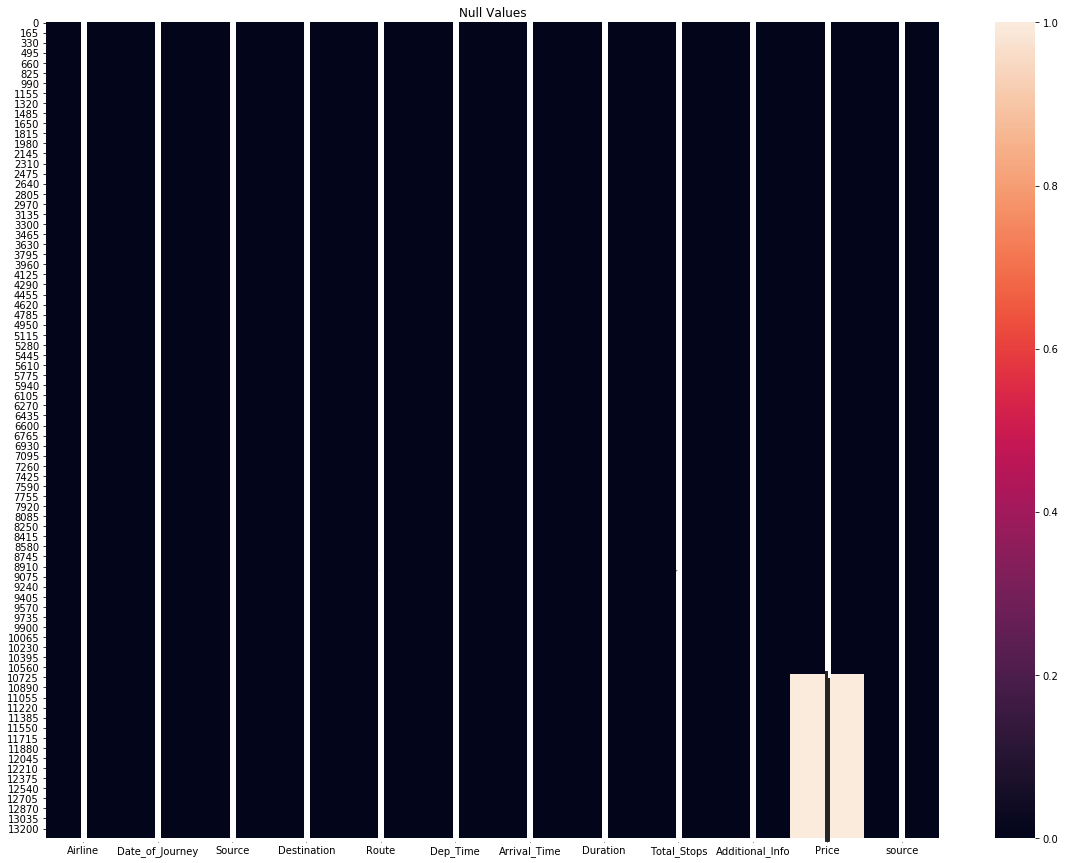

In [10]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

There is only 1 row with missing values in Route and Total_Stops columns.

In [37]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,train


In [38]:
print(df.loc[[9039]])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info   Price source  
9039  09:25 07 May  23h 40m         NaN         No info  7480.0  train  


Since its only 1 row we will manually compute the missing value based on similar rows with identical values for other columns.

In [39]:
df.loc[(df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin') & (df['Airline'] == 'Air India') & (df['Duration'] == '23h 40m') & (df['Price'] == 7480.0)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480.0,train
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480.0,train
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480.0,train
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480.0,train
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,train


In [40]:
df.at[9039, 'Total_Stops'] = '1 stop'
df.at[9039, 'Route'] = 'DEL → MAA → COK'

In [41]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

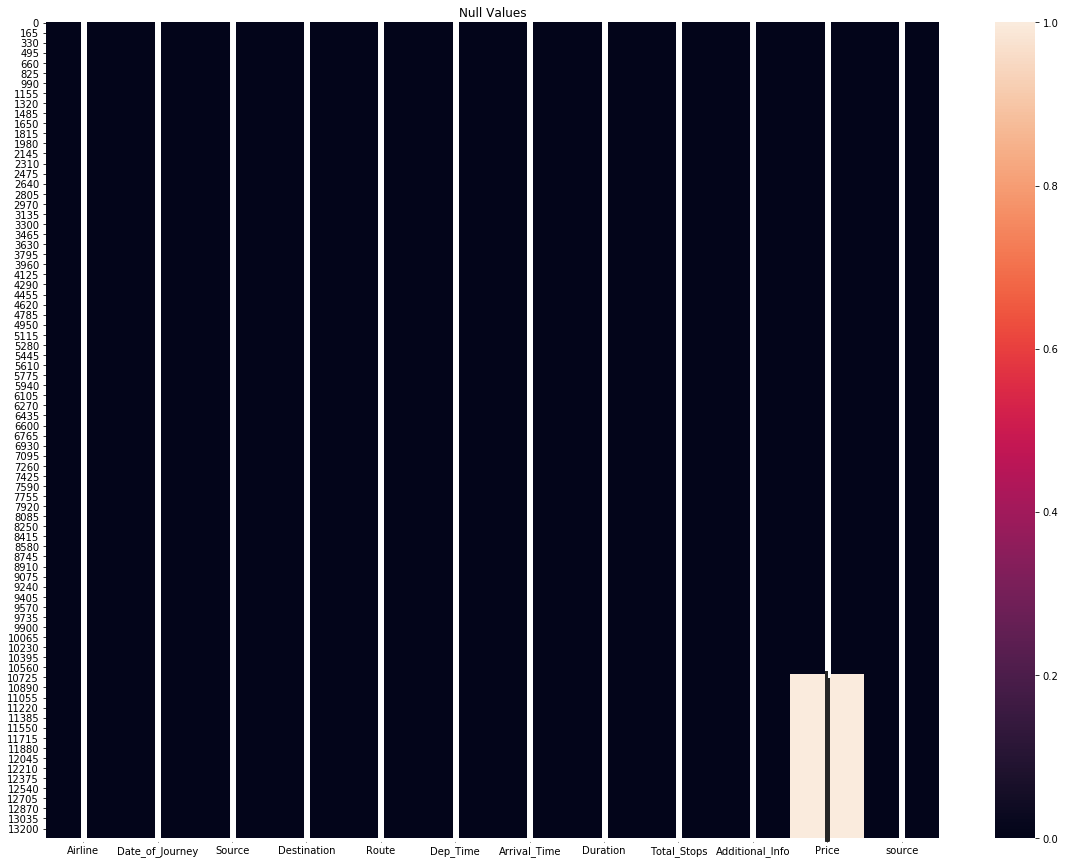

In [16]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

# Feature Engineering

In [42]:
df['Month'] = df['Date_of_Journey'].apply(lambda x: x[-7:-5])
df['Month'] = df['Month'].astype(float)
df['Month']

0        3.0
1        5.0
2        6.0
3        5.0
4        3.0
        ... 
13349    6.0
13350    3.0
13351    3.0
13352    3.0
13353    6.0
Name: Month, Length: 13354, dtype: float64

From the date of journey column we made another column for the month of journey.

In [43]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x[:5])
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

We removed the arrival date from the arrival time column.

In [44]:
df['Total_Stops'].replace('non-stop', '0 stops', inplace = True)

In [45]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: x[:1])
df['Total_Stops'] = df['Total_Stops'].astype(float)
df['Total_Stops']

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
13349    1.0
13350    0.0
13351    1.0
13352    1.0
13353    1.0
Name: Total_Stops, Length: 13354, dtype: float64

Changed non-stop to 0 stops and then converted all the values in Total stops column to float.

In [46]:
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
13349    1435
13350     155
13351     395
13352     915
13353     860
Name: Duration, Length: 13354, dtype: int64

Converted the duration into minutes from hours minutes so it can be easy to interpret.

In [48]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [49]:
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

Separeted the departure hour and minute from Departure time. Did the same with arrival time.

In [50]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0.0,No info,3897.0,train,3.0,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2.0,No info,7662.0,train,5.0,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2.0,No info,13882.0,train,6.0,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1.0,No info,6218.0,train,5.0,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1.0,No info,13302.0,train,3.0,16,50,21,35
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145,0.0,No info,3873.0,train,6.0,9,0,11,25
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,930,1.0,In-flight meal not included,11087.0,train,3.0,18,55,10,25
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,1265,1.0,No info,22270.0,train,3.0,8,0,5,5
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,1530,1.0,In-flight meal not included,11087.0,train,3.0,8,55,10,25
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,470,1.0,No info,8625.0,train,5.0,11,25,19,15


In [51]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)

In [52]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0.0,No info,3897.0,train,3.0,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No info,7662.0,train,5.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882.0,train,6.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1.0,No info,6218.0,train,5.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1.0,No info,13302.0,train,3.0,16,50,21,35


In [53]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

In [57]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# EDA and Data Visualisation

Text(0.5, 0, 'Count of flights')

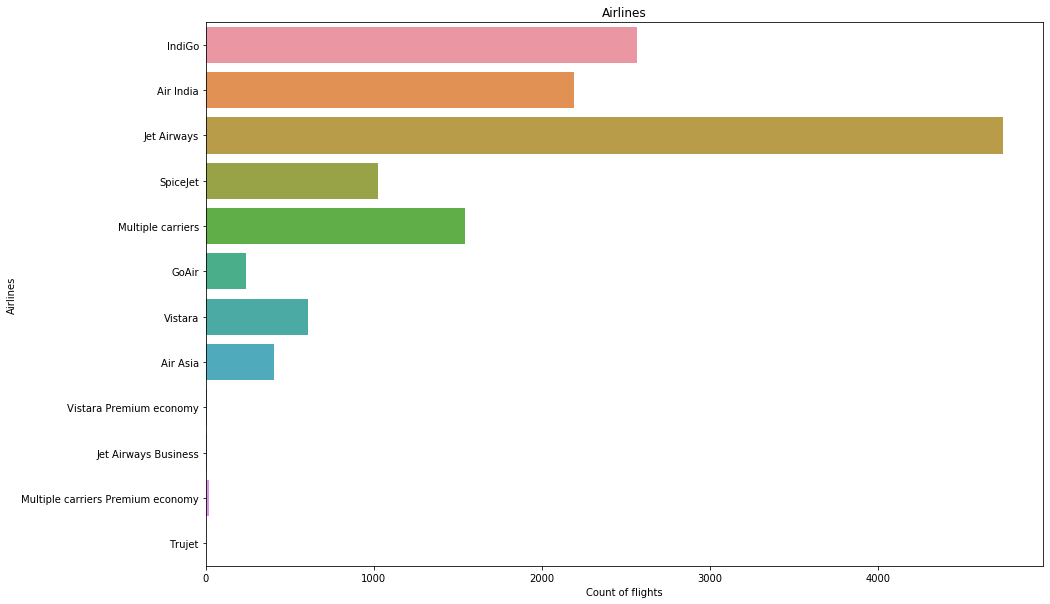

In [62]:
plt.figure(figsize = (15, 10))
plt.title('Airlines')
ax = sns.countplot(y = 'Airline', data = df)
plt.ylabel('Airlines')
plt.xlabel('Count of flights')

In [64]:
df.loc[(df['Airline'] == 'Vistara Premium economy')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
426,Vistara Premium economy,Banglore,New Delhi,BLR → DEL,155,0.0,No info,11793.0,train,3.0,16,0,18,35
7657,Vistara Premium economy,Chennai,Kolkata,MAA → CCU,135,0.0,No info,9125.0,train,3.0,7,5,9,20
8615,Vistara Premium economy,Banglore,Delhi,BLR → DEL,170,0.0,No info,5969.0,train,4.0,11,30,14,20
10747,Vistara Premium economy,Banglore,New Delhi,BLR → DEL,160,0.0,No info,NaN,test,3.0,19,40,22,20
11496,Vistara Premium economy,Banglore,New Delhi,BLR → DEL,165,0.0,No info,NaN,test,3.0,9,50,12,35


In [65]:
df.loc[(df['Airline'] == 'Trujet')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195,1.0,No info,4140.0,train,3.0,13,5,16,20


Jet airways have the highest number of flights while Trujet has the lowest.

Text(0, 0.5, 'Count of flights')

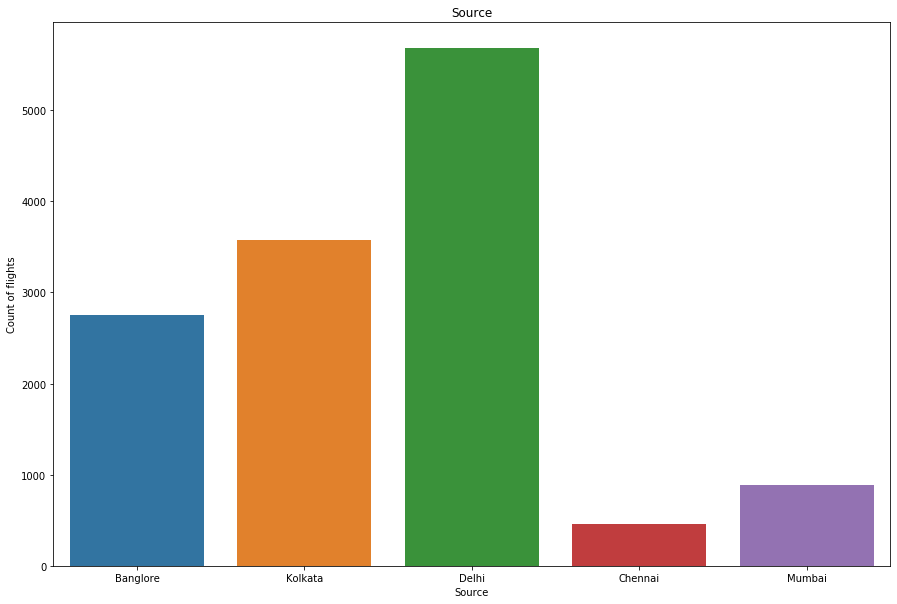

In [66]:
plt.figure(figsize = (15, 10))
plt.title('Source')
ax = sns.countplot(x = 'Source', data = df)
plt.xlabel('Source')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Count of flights')

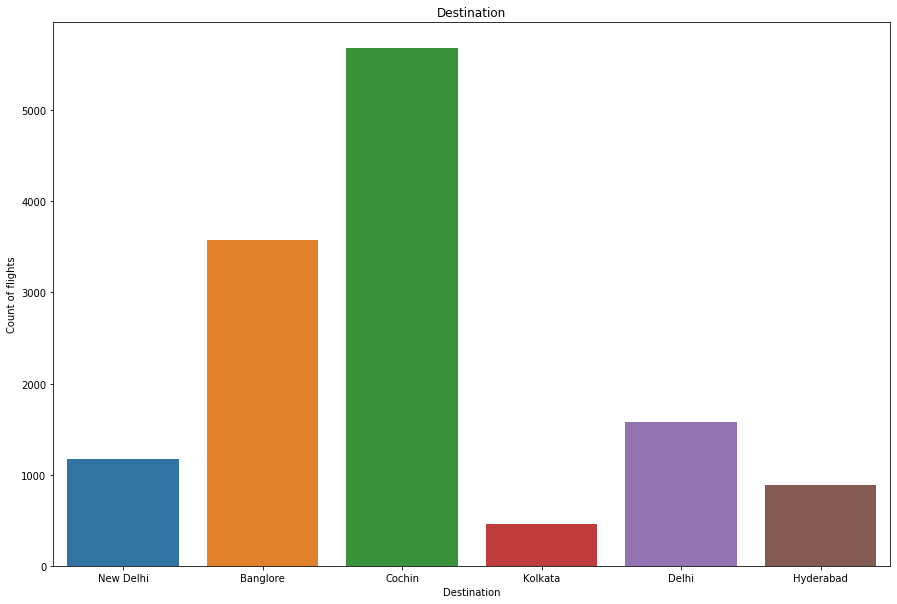

In [67]:
plt.figure(figsize = (15, 10))
plt.title('Destination')
ax = sns.countplot(x = 'Destination', data = df)
plt.xlabel('Destination')
plt.ylabel('Count of flights')

Delhi and New Delhi are same places, so we will merge them.

In [68]:
df['Destination'].replace('New Delhi', 'Delhi', inplace = True)

Text(0, 0.5, 'Count of flights')

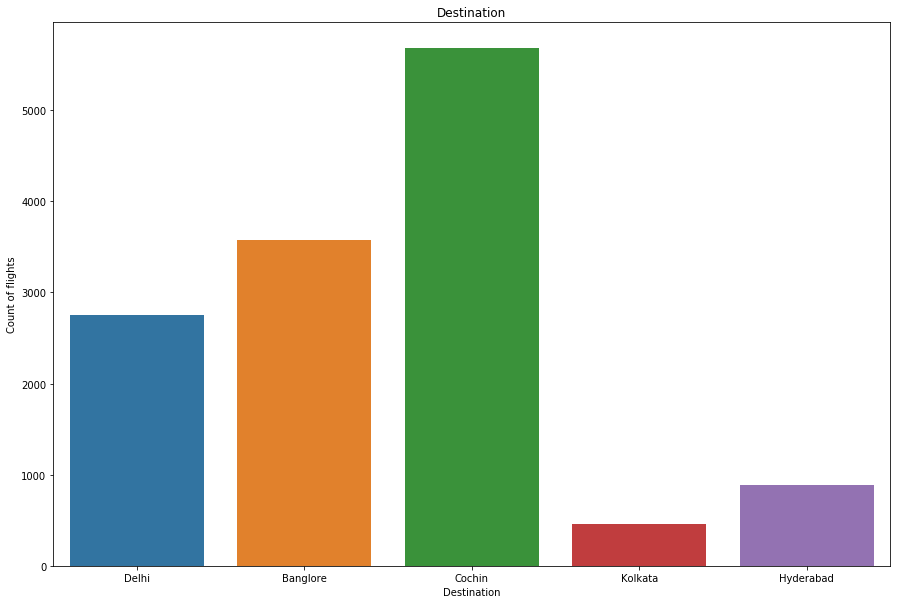

In [69]:
plt.figure(figsize = (15, 10))
plt.title('Destination')
ax = sns.countplot(x = 'Destination', data = df)
plt.xlabel('Destination')
plt.ylabel('Count of flights')

Most of the flights take off from Delhi and most of the flights tend to be heading towards Cochin.

Text(0.5, 0, 'Count of flights')

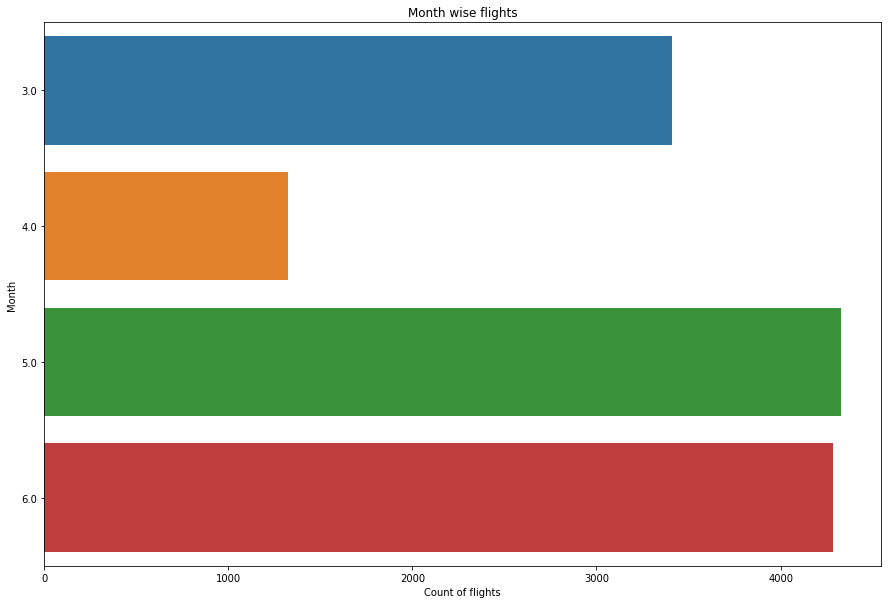

In [70]:
plt.figure(figsize = (15, 10))
plt.title('Month wise flights')
ax = sns.countplot(y = 'Month', data = df)
plt.ylabel('Month')
plt.xlabel('Count of flights')

From the given dataset, most of the data is from the month of May and June while april has the least number of flights.

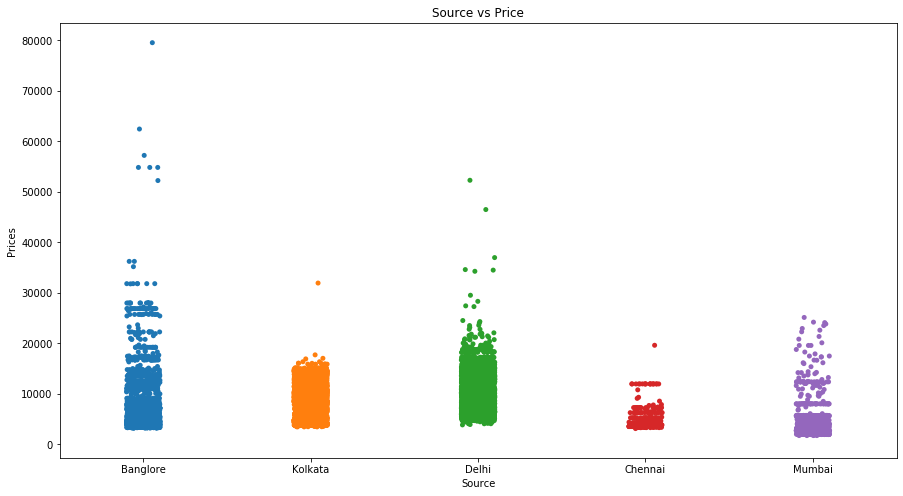

In [71]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Source'], df['Price'])
ax.set(xlabel = 'Source', ylabel = 'Prices')
plt.title('Source vs Price')
plt.show()

Flights from Banglore are costliest while flights from Chennai are cheapest.

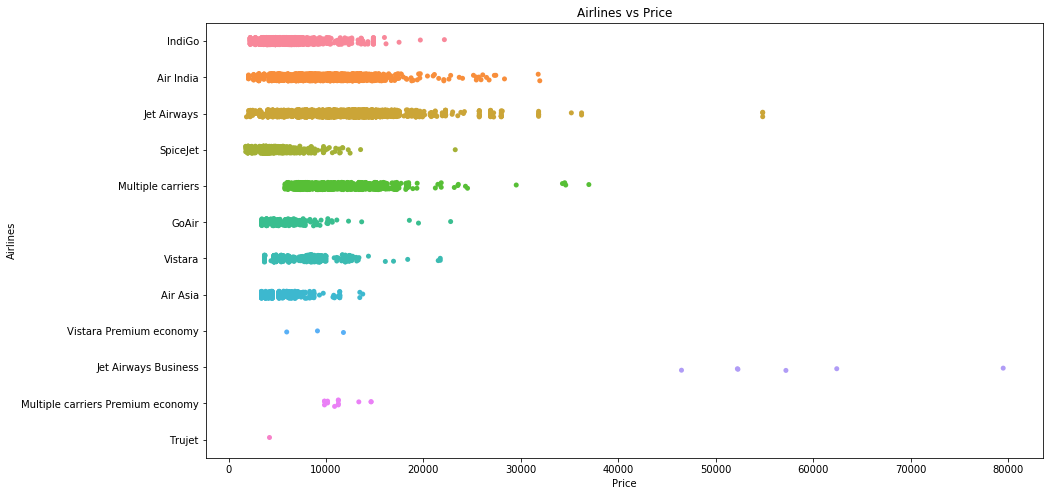

In [72]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Price'], df['Airline'])
ax.set(xlabel = 'Price', ylabel = 'Airlines')
plt.title('Airlines vs Price')
plt.show()

Even though they are low in number, Jet airways business flights are the costliest.

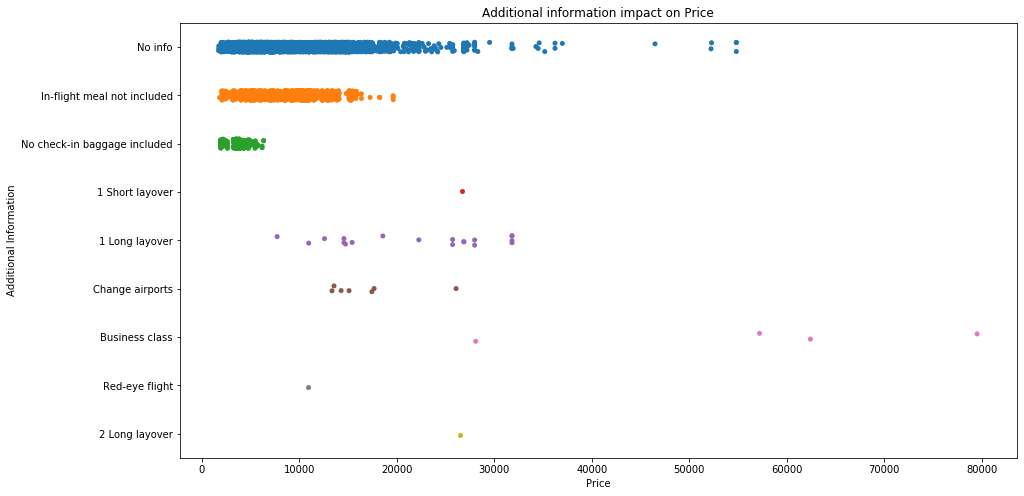

In [73]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(df['Price'], df['Additional_Info'])
ax.set(xlabel = 'Price', ylabel = 'Additional Information')
plt.title('Additional information impact on Price')
plt.show()

As expected business class are the costliest while flights with no check in baggage included are cheapest.

# Encoding Object data types

In [74]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Total_Stops        float64
Additional_Info     object
Price              float64
source              object
Month              float64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
dtype: object

In [75]:
s = (df.dtypes == 'object')
obj_cols = list(s[s].index)

print("Object variables:")
print(obj_cols)

Object variables:
['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'source']


In [76]:
obj_cols.remove('source')

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in obj_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [78]:
df.dtypes

Airline              int32
Source               int32
Destination          int32
Route                int32
Duration             int64
Total_Stops        float64
Additional_Info      int32
Price              float64
source              object
Month              float64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
dtype: object

# Separating train and test from dataset

Now we are through with data analysis and data cleaning, we will split the dataset back to train and test.

In [93]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [94]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)
test.drop('Price', axis = 1, inplace = True)

In [95]:
train.shape, test.shape

((10683, 13), (2671, 12))

In [96]:
x = train.drop('Price', axis = 1)
y = train['Price']

# Best Random State

In [97]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.4685044837188447 on Random State 371


# Creating train test split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 371)

In [99]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))
    print (mean_absolute_error(y_test, pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.4685044837188447
10305642.003672335
2440.9343033261803
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.6901515959329209
6007927.875040375
1112.8488301731204
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=No

In [100]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  model is : 0.41516552814315294
 
Cross Validation Score for  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  model is : 0.6542577877537252
 
Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
           

Random Forest model has the lowest difference between R2 score and cross val score, hence we will work with it.

# Hypertuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [103]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [104]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [108]:
rfr = RandomForestRegressor(random_state=371, max_features='auto', n_estimators= 200, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.7837761806902204
4192557.051214263
1289.236490908964


In [107]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for ',rfr, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=371, verbose=0, warm_start=False)  model is : 0.7405696541429008


After hypertuning with gridsearchcv our models R2 score increased to 78 from 76 and cv score also increased from 73 to 74.

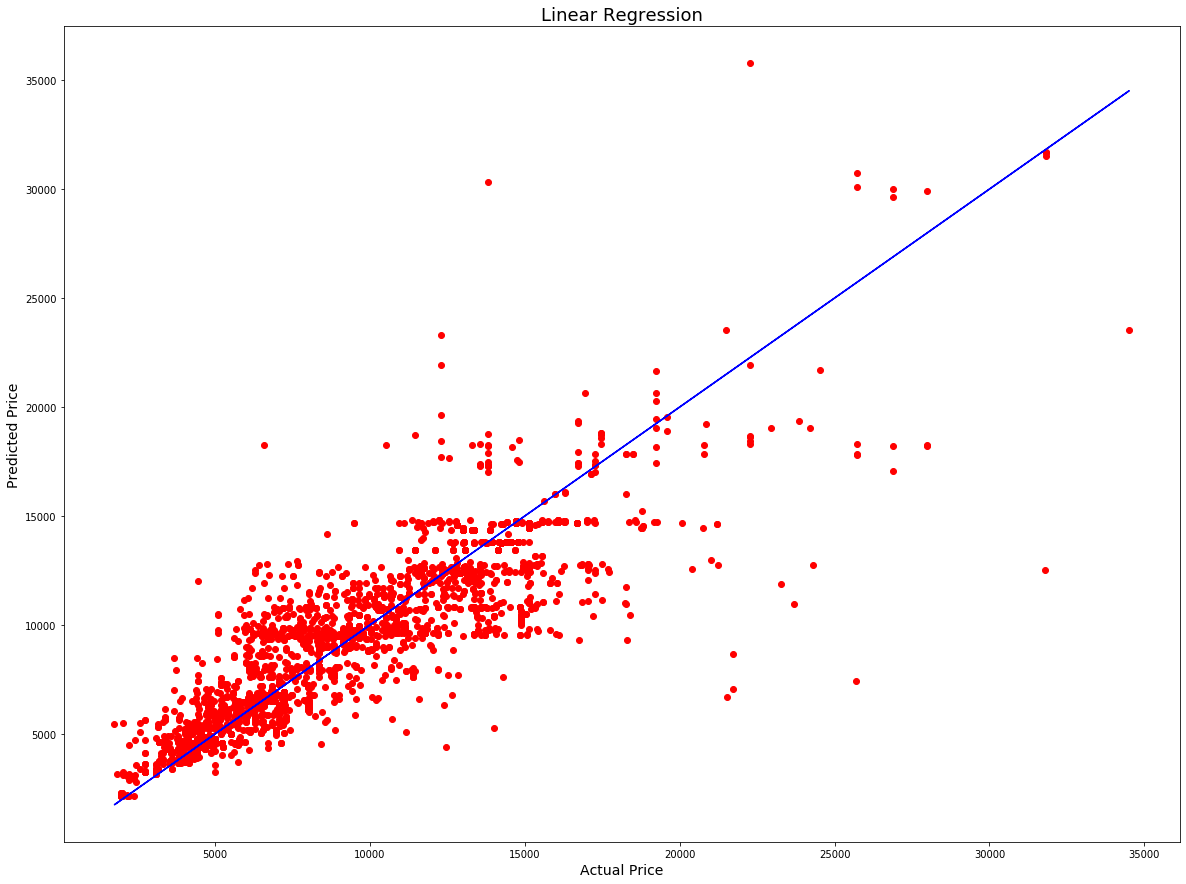

In [114]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Price', fontsize = 14)
plt.ylabel('Predicted Price', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [115]:
import pickle

filename = 'FlightRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Using the Test set

In [116]:
fitted_model = pickle.load(open('FlightRfr.pkl', 'rb'))

In [117]:
fitted_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=371, verbose=0, warm_start=False)

In [118]:
predictions = fitted_model.predict(test)

In [119]:
predictions

array([14724.18536242,  5070.10020935, 12393.81398843, ...,
       14810.27196705, 10716.49102315,  9506.14478279])